In [20]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#for my windows10 laptop I had to install this package using pip rather than anaconda.  
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.api as sm
#import scipy.spatial.distance as spd
#import statsmodels.graphics.gofplots as stats_graph
import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No ")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# # for phylogenetic trees: 
# from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node  #the last three are for visualization
# # In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
# from pyvirtualdisplay import Display
# display = Display(visible=False, size=(1024, 768), color_depth=24)
# display.start()
#ete3 is not officially supported on windows, and so must be loaded via pip: 
# pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

spec_lookup = {'Klac' : 'Kluyveromyces lactis', 'Scer': 'Saccharomyces cerevisiae', 
 'Cgla' : 'Candida glabrata' , 'Ncas': 'Naumovozyma castellii', 
 'Sbay' : 'Saccharomyces bayanus', 'Smik': 'Saccharomyces mikatae',
 'Lwal' : 'Lachancea waltii', 'Spar' : 'Saccharomyces paradoxus', 
 'Lklu' : 'Lachancea kluyverii', 'Dhan': 'Debaryomyces hansenii', 
 'Calb' : 'Candida albicans', 'Ylip': 'Yarrowia lipolytica'}

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
I am about to import a library
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
are you online? Yes/No Yes


## Identify conditions most correlated with PKA inhibition

### S. Cer

In [69]:
# Load S.Cer Deseq data

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)


# Load S.Cer Regev Data

spec = 'Scer'
fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress.csv')  
spec_data = pd.read_csv(fname_array_data, index_col=0)

pkainh_deseq_LFC = pkainh_deseq.loc[:,['log2FoldChange']]
pkainh_regev_data = pkainh_deseq_LFC.merge(spec_data,how='inner',left_index=True, right_index=True)
pkainh_regev_data.rename(columns = {'log2FoldChange':'PKA_inh'}, inplace=True)


<IPython.core.display.Javascript object>


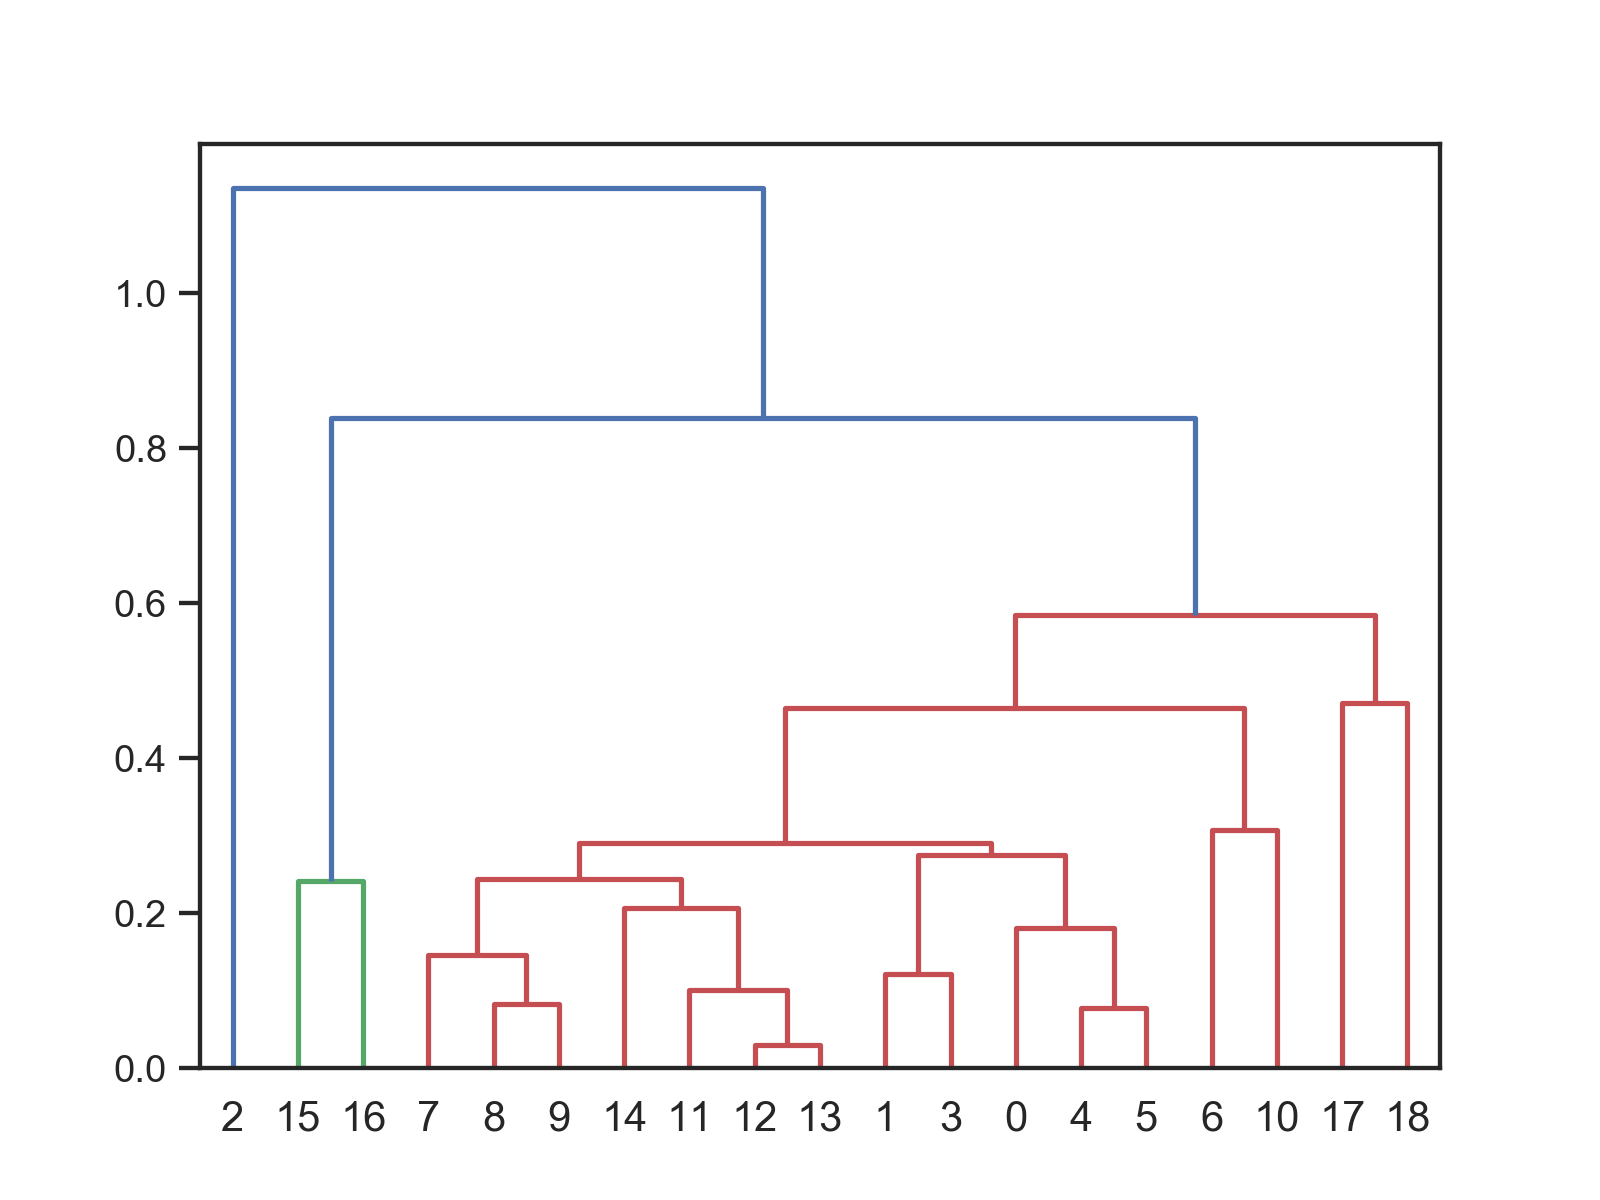

[2, 15, 16, 7, 8, 9, 14, 11, 12, 13, 1, 3, 0, 4, 5, 6, 10, 17, 18]
[0, 5, 4, 1, 3, 11, 12, 13, 14, 9, 8, 7, 6, 10, 18, 17, 16, 15, 2]


<IPython.core.display.Javascript object>


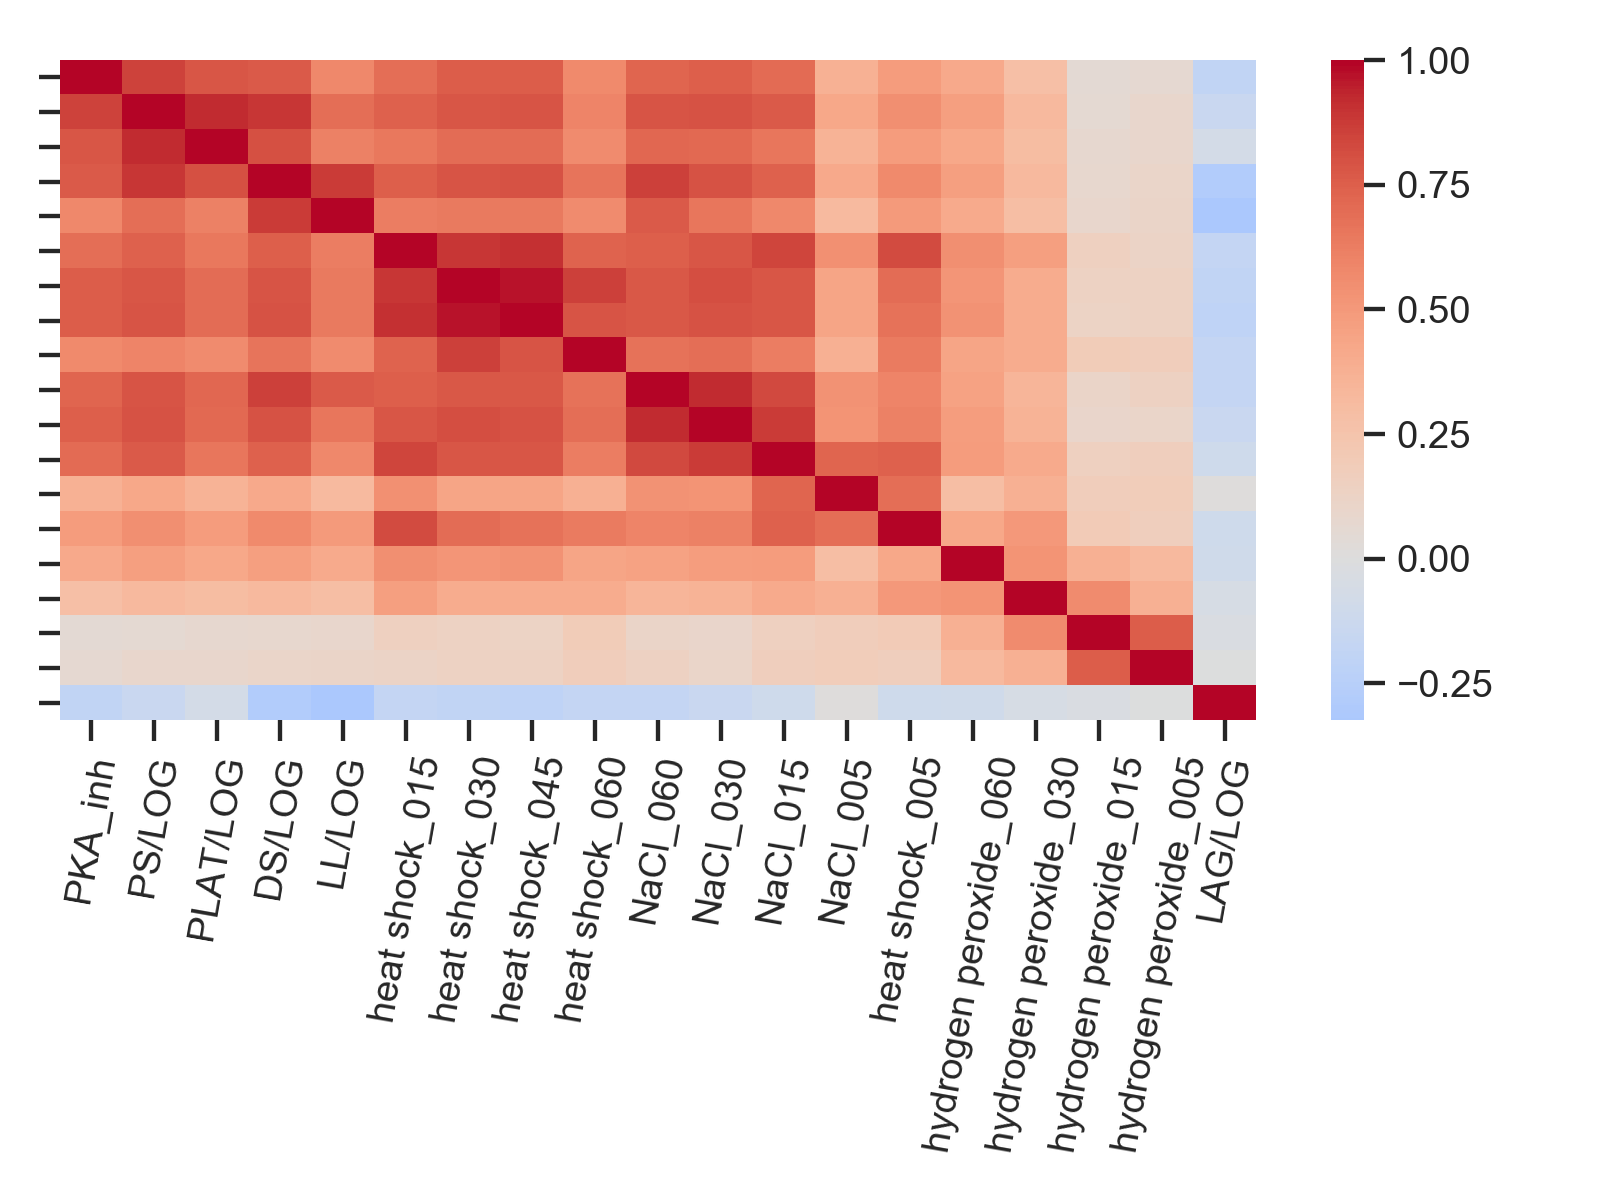

In [70]:
#Correlation heatmap with all conditions v.s. PKA inhibition. 

#First do heirarchical clustering of conditions, then reorder matrix. 
pkainh_regev_data_nanrm = pkainh_regev_data.fillna(0.0)
pkainh_regev_data_mat = pkainh_regev_data_nanrm.values.transpose()
col_cluster = sch.linkage(pkainh_regev_data_mat, method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']
#new columns look almost right but need to flip the tree around.  
print(col_ind_reorder)
#col_ind_reorder_pretty = [0,3,4,1,5,11,12,13,14,6,7,18,17,16,15,8,9,2]
#Reordered in order to have PKA inh in the upper left and group similar conditions without breaking tree structure. 
col_ind_reorder_pretty = [0,5,4,1,3,11,12,13,14, 9, 8, 7, 6, 10, 18, 17, 16, 15, 2]

print(col_ind_reorder_pretty)

# col_ind_reorder_branch_flip ={16 : 19, 19: 18, 18:16}
# col_ind_reorder_pretty = col_ind_reorder[:]  #Need to use slice because otherwise the two lists are linked.  This makes a copy
# for key in col_ind_reorder_branch_flip.keys():
#     ind_ind = col_ind_reorder.index(key)
#     col_ind_reorder_pretty[ind_ind] = col_ind_reorder_branch_flip[key]

old_cols = pkainh_regev_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]


pkainh_regev_data_col_reorder = pkainh_regev_data[new_cols]


#Plot correlation Matrix
corr = pkainh_regev_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr, cmap='coolwarm', center=0.0)
ax.tick_params(axis='y',labelleft = False)
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
#plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_corr.png')
#Clean up labels


sc_corr = corr


The conditions that are closest to PKA inhibition are

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45
NaCl_060
NaCl_030

### K.Lac

In [66]:
# K.Lac

# Load Deseq data

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_KL_AS_WT_nmpp1.csv'), index_col=0)
#remove underscore from kl genenames
pkainh_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(pkainh_deseq.index))
pkainh_deseq.set_index('kl_genename', inplace=True)

# Load Regev Data

spec = 'Klac'
fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress.csv')  
spec_data = pd.read_csv(fname_array_data, index_col=0)

pkainh_deseq_LFC = pkainh_deseq.loc[:,['log2FoldChange']]
pkainh_regev_data = pkainh_deseq_LFC.merge(spec_data,how='inner',left_index=True, right_index=True)
pkainh_regev_data.rename(columns = {'log2FoldChange':'PKA_inh'}, inplace=True)


[6, 7, 10, 11, 12, 13, 14, 0, 3, 4, 1, 5, 15, 18, 16, 17, 2, 8, 9]
[0, 5, 4, 1, 3, 10, 11, 12, 13, 14, 6, 7, 8, 9, 2, 15, 16, 17, 18]


<IPython.core.display.Javascript object>


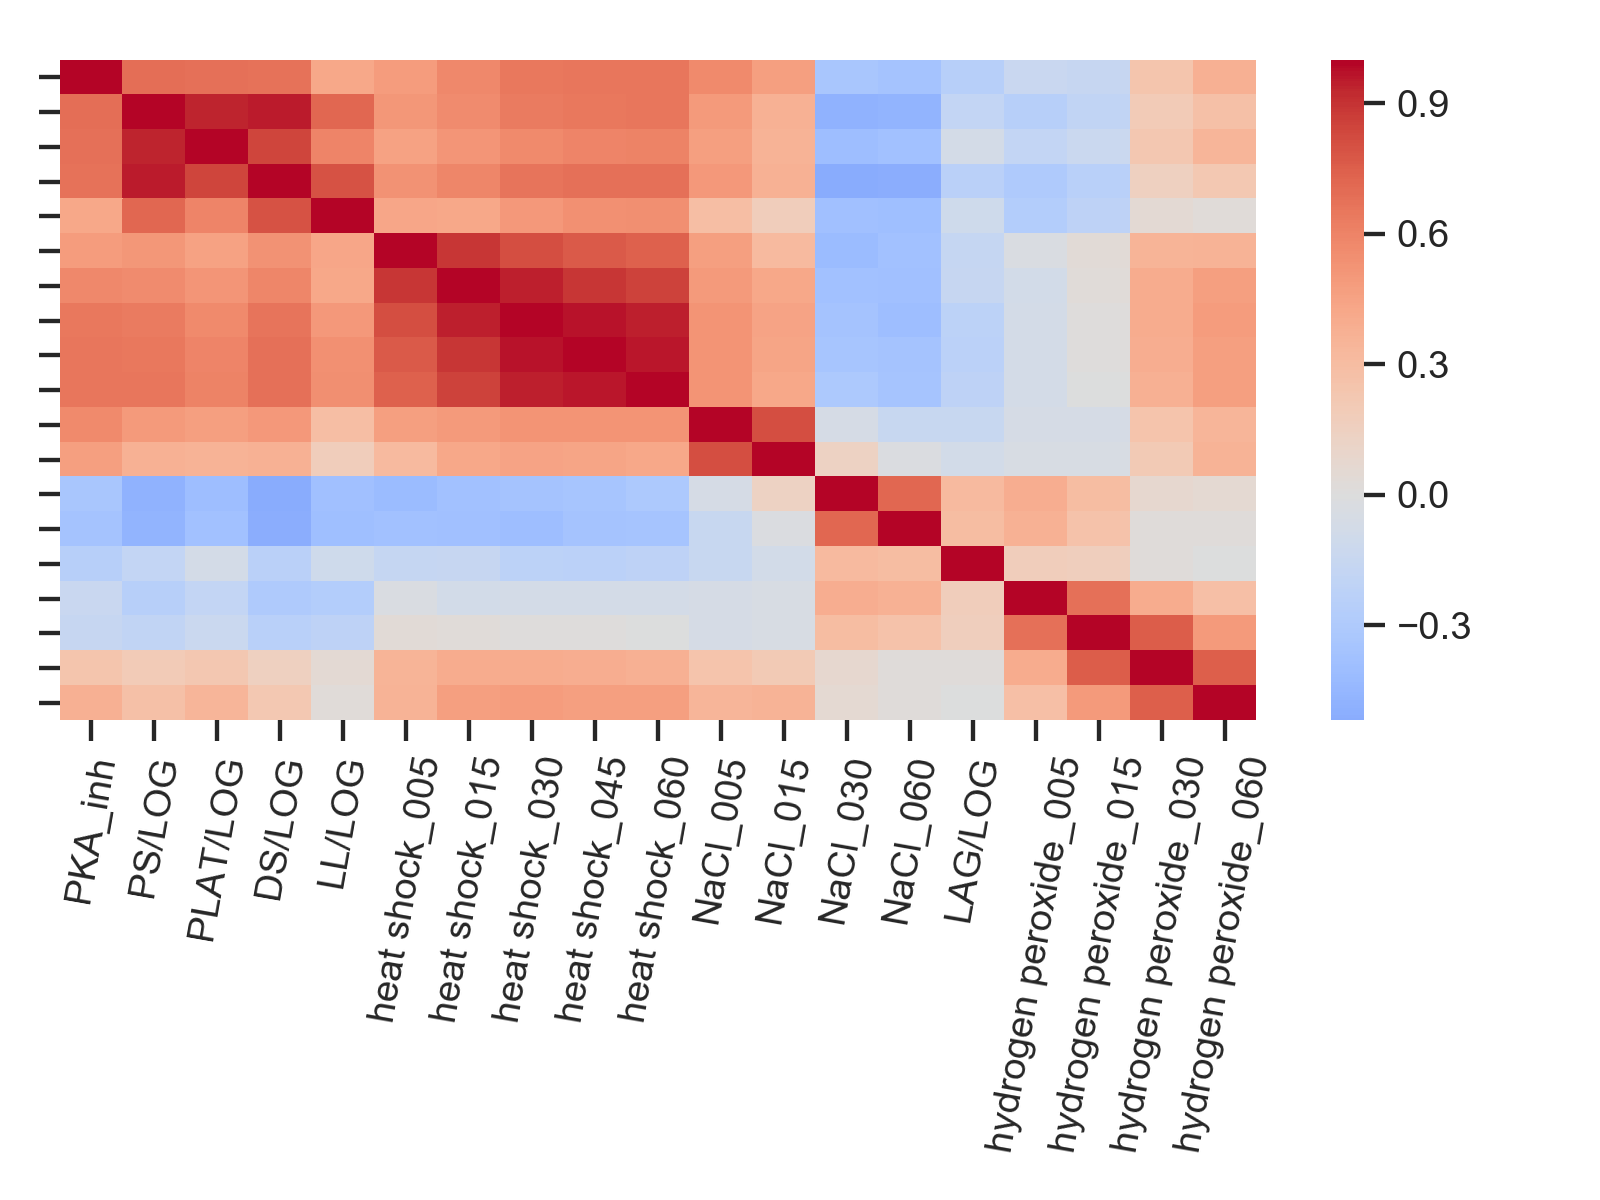

In [67]:
#Correlation heatmap with all conditions v.s. PKA inhibition. 

#First do heirarchical clustering of conditions, then reorder matrix. 
pkainh_regev_data_nanrm = pkainh_regev_data.fillna(0.0)
pkainh_regev_data_mat = pkainh_regev_data_nanrm.values.transpose()
col_cluster = sch.linkage(pkainh_regev_data_mat, method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']
#new columns look almost right but need to flip the tree around.  
print(col_ind_reorder)
#Reordered in order to have PKA inh in the upper left and group similar conditions without breaking tree structure. 
col_ind_reorder_pretty = [0,5,4,1,3,10,11,12,13,14, 6, 7, 8, 9, 2, 15, 16, 17, 18]

print(col_ind_reorder_pretty)

# col_ind_reorder_branch_flip ={16 : 19, 19: 18, 18:16}
# col_ind_reorder_pretty = col_ind_reorder[:]  #Need to use slice because otherwise the two lists are linked.  This makes a copy
# for key in col_ind_reorder_branch_flip.keys():
#     ind_ind = col_ind_reorder.index(key)
#     col_ind_reorder_pretty[ind_ind] = col_ind_reorder_branch_flip[key]

old_cols = pkainh_regev_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]


pkainh_regev_data_col_reorder = pkainh_regev_data[new_cols]


#Plot correlation Matrix
corr = pkainh_regev_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr, cmap='coolwarm', center=0.0)
ax.tick_params(axis='y',labelleft = False)
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
#plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_corr.png')
#Clean up labels


kl_corr = corr

Conditions in K.Lac closest to PKA inhibition: 

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45
heat shock_60


The overlap between S.Cer and K.Lac is 

PS/LOG
PLAT/LOG
DS/LOG
heat shock_30
heat shock_45

So I will use those as estimates of PKA inhibition in other species. 

In [68]:
#Plot correlation v.s. PKA inhibition for all conditions in each species. 

data_to_plot = sc_corr.loc[:,['PKA_inh']].merge(kl_corr.loc[:,['PKA_inh']], how='inner', left_index=True, right_index=True, suffixes=('_Scer', '_Klac'))

xlabel = 'S.Cer correlation to PKA inh'
ylabel = 'K.Lac correlation to PKA inh'

data = []

trace = pygo.Scatter(
            x = data_to_plot['PKA_inh_Scer'], 
            y =  data_to_plot['PKA_inh_Klac'],
            text = list(data_to_plot.index),
            mode = 'markers',
            #marker = {'opacity': 0.5 }, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'conditions' 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'KL_SC_vs_regev_conditions_correlation')